In [821]:
import pypdf
import os 
from dotenv import load_dotenv
load_dotenv()

python-dotenv could not parse statement starting at line 6


True

In [ ]:

os.environ["OPENAI_API_KEY"]= os.getenv("OPENAI_API_KEY")

INPUT 

In [823]:
def resume(pdf_path: str) -> str:
    with open(pdf_path, "rb") as file:
        reader = pypdf.PdfReader(file)
        resume_text = ""
        for page in reader.pages:
            resume_text += page.extract_text() + "\n"
    return resume_text

In [824]:
def jd(jd_pdf_path: str) -> str:
    with open(jd_pdf_path, "rb") as file:
        reader = pypdf.PdfReader(file)
        jd_text = ""
        for page in reader.pages:
            jd_text += page.extract_text() + "\n"
    return jd_text

In [825]:
def extract_resume_summary(pdf_path: str) -> str:
    resume_text = resume(pdf_path)
    return resume_text[:5000]

In [826]:
from langchain_core.tools import tool



In [827]:
resume_pdf_path = "C:\\Users\\itsme\\OneDrive\\Desktop\\OPT\\DilipVummaneni.pdf"
resume_summary = extract_resume_summary(resume_pdf_path)

In [828]:
print(resume_summary)

Dilip Vummaneni                                                   
Senior AI/ML Engineer                                                                                               
Email: vummanenidilip@gmail.com  
Mobile: 940-843-0998 
LinkedIn                                                                                                                   
Professional Summary 
• 5+ Years of Experience in Data Analytics, Machine Learning (ML), Predictive Modeling, Natural Language Processing 
(NLP), Deep Learning, and Generative AI, delivering innovative AI-driven solutions.   
• Expert in Data Preprocessing and Analysis, including Data Cleaning, Exploratory Data Analysis (EDA), and Initial Data 
Analysis (IDA), ensuring high data quality and actionable insights.   
• Comprehensive Knowledge of the Data Science Lifecycle, from Data Acquisition and Engineering to Preprocessing , 
Feature Engineering, Statistical Modeling, A/B Testing, and Data Visualization.   
• Proficient in Mach

In [829]:
jd_pdf_path="C:\\Users\\itsme\\Downloads\\jd.pdf"
job_description = jd(jd_pdf_path)
print(job_description)

Job Details 
Role: Data Science/ML Engineer 
Location: San Jose, CA (Onsite) 
Duration: Fulltime Permanent 
JOB DESCRIPTION: 
• Masters degree/PhD in Computer Science & Data Science/AI ML or a related technical field 
or equivalent practical experience. 
• 2 years of work or educational experience in Machine Learning or Artificial Intelligence 
• Experience with one or more additional general purpose programming languages including 
but not limited to: Java (ideal), Go, or C/C++ 
SKILLS REQUIRED: 
• Neural networks, CNN, RNN/LSTM 
• LLMs and generative AI, including prompt engineering 
• Python, ML, Statistics 
• Machine Learning 
PREREQUISITES PYTHON SKILLS: 
• Python installation, environment setup and Jupyter Notebook 
• Object and Data Structures basics 
• Comparison Operators and Statements 
• Methods and Functions 
• Errors and Exception handling 
• Built-in functions and Python Generators 
• Using scientific Python libraries numpy, pandas, matplotlib, scikit-learn 
• Use data vi

In [830]:
from langchain_core.tools import tool

@tool
def llm(resume_summary: str, job_description: str) -> str:
    """ This tool takes a resume summary and a job description, extracts key skills, and determines if the resume matches the job requirements."""
    model = ChatOpenAI(model="gpt-4o")

    prompt = f"""
As an expert Job Matching Assistant, your primary role is to meticulously evaluate candidate resumes against specific job descriptions.

Your task involves two main phases:
1.  **Skill Extraction**: Accurately identify and list all *key technical and relevant soft skills* present in the provided Candidate Resume Summary and Target Job Description.
2.  **Compatibility Analysis**: Compare the extracted skills to determine the degree of alignment between the candidate's profile and the job requirements. Consider both explicit matches and transferable skills, and identify any notable gaps.

Based on this comprehensive analysis, you must make a clear determination of the resume's suitability for the role and provide actionable insights.

---
**Candidate Resume Summary:**
{resume_summary}

**Target Job Description:**
{job_description}
---

Your output *must strictly* adhere to the following JSON format:

```json
{{
  "extracted_resume_skills": ["List of key technical and soft skills identified from the Resume Summary"],
  "extracted_jd_skills": ["List of key technical and required skills from the Job Description"],
  "analysis": ["A list of specific key skills or areas from the Job Description that the resume either lacks or could strengthen. These are topics the candidate might need to prepare for an interview."],
  "match_result": "Your final determination of suitability: 'Suitable' or 'Not Suitable'",
  "reason": "A concise explanation (2-3 sentences) justifying your 'match_result' based on skill alignment, gaps, or notable strengths."
}}
```
"""

    output = model.invoke(prompt)
    return output.content

In [843]:
@tool
def guider(input: dict) -> str:
    """
    Suggests important topics to revise based on LLM's analysis.
    """
    analysis = input["llm_result"]
    model = ChatOpenAI(model="gpt-4o")

    prompt = f"""
Here's an improved and more effective version of the prompt for your "career coach" (`guider`) tool:

```
As an expert and supportive Career Coach specializing in technical interview preparation, your role is to guide candidates based on their skill gaps.

Given the following AI-generated skill gap analysis, which highlights areas from the job description that the candidate's resume may lack or could strengthen:

---
**Skill Gap Analysis:**
{analysis}
---

Your task is to identify and recommend the **3 to 5 most critical technical topics** the candidate should intensively brush up on before attending their interview.

For each recommended topic:
* State the **specific technical area**.
* Briefly explain its **relevance** based on the provided analysis.
* Suggest a **practical, actionable way** to review or practice it (e.g., "Review common data structures like trees and graphs," or "Practice SQL queries focusing on JOINs and aggregations").

Ensure your advice is concise, highly practical, and empowering for the candidate, directly addressing the identified gaps to maximize their interview readiness.
```
"""

    response = model.invoke(prompt)
    return response.content

In [844]:
print(llm)

name='llm' description='This tool takes a resume summary and a job description, extracts key skills, and determines if the resume matches the job requirements.' args_schema=<class 'langchain_core.utils.pydantic.llm'> func=<function llm at 0x000001A6DCB67E20>


In [845]:
from langgraph.graph import Graph

In [846]:
workflow1 = Graph()


In [847]:
#workflow1.add_node("INPUT NODE",input_node)

In [848]:
workflow1.add_node("LLM NODE", llm)

In [849]:
workflow1.add_node("GUIDER", guider)

In [850]:
from IPython.display import Image,display

In [851]:
workflow1.set_entry_point("LLM NODE")
workflow1.add_edge("LLM NODE", "GUIDER")
workflow1.set_finish_point("GUIDER")

In [852]:
app=workflow1.compile()

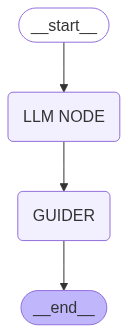

In [853]:
display(Image(app.get_graph().draw_mermaid_png()))

In [854]:
input_data = {
    "resume_summary": resume_summary,
    "job_description": job_description
}

result = llm.invoke(input_data)
print(result)

```json
{
  "extracted_resume_skills": [
    "Data Analytics",
    "Machine Learning",
    "Predictive Modeling",
    "Natural Language Processing",
    "Deep Learning",
    "Generative AI",
    "Data Preprocessing",
    "Exploratory Data Analysis",
    "Feature Engineering",
    "Statistical Modeling",
    "A/B Testing",
    "Data Visualization",
    "Ensemble Methods",
    "Regression",
    "SVM",
    "XGBoost",
    "Decision Trees",
    "Neural Networks",
    "Clustering",
    "PCA",
    "SQL",
    "Azure Synapse Analytics",
    "Azure Blob Storage",
    "MySQL",
    "Python",
    "Scikit-Learn",
    "Spark",
    "Hive",
    "Azure Data Factory",
    "ETL pipelines",
    "AWS",
    "Amazon SageMaker",
    "Amazon Redshift",
    "Amazon S3",
    "NLP",
    "Power BI",
    "Tableau",
    "Spotfire",
    "Hypothesis Testing",
    "Time-Series Analysis",
    "Databases",
    "Project Management",
    "Terraform",
    "Ansible",
    "Docker",
    "Kubernetes",
    "Flask",
    "Django",
